# Kagome

## In this example

 - Building Hamiltonians with arbitrary connectivity
 - Eigensolving for ground states
 - The `SpinConserve` subspace
 - The `XParity` subspace
 - Computing correlation functions

## Overview

The Kagome lattice is physically interesting because its unique connectivity yields a frustrated magnet---with an antiferromagnetic interaction, there is no way to configure the spins so that neighbors are all anti-aligned. This has the potential to produce a *quantum spin liquid*. In this example we explore the behavior of spins in the Kagome lattice on a torus.

In the file `lattice_library.py`, we provide the Python dict `kagome_clusters` which contains a set of finite-size Kagome lattice clusters specified by their basis vectors (see [TODO]()), as well as a function `basis_to_graph` to generate a list of vertices and edges from those basis vectors. We've also included some code in `plot_lattice.py` to plot these lattices, which also shows how the spins are numbered. Here is an example:

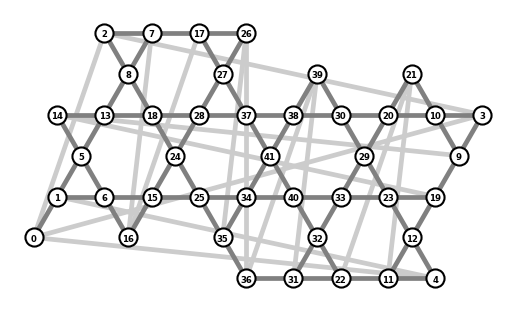

In [3]:
%matplotlib inline

from lattice_library import basis_to_graph, kagome_clusters
from plot_lattice import plot_lattice

plot_lattice(
    *basis_to_graph(kagome_clusters['42a'])
)

On this lattice, we will implement the antiferromagnetic Heisenberg interaction between each neighboring pair of spins:
$$H=\sum_{\langle i, j \rangle} \vec{S}_i \cdot \vec{S}_j$$
where $\langle i, j \rangle$ means the indices of spins that are nearest-neighbors on the lattice, and $\vec{S} = (S^x, S^y, S^z)$.

## Goals

Our computational task in this example is quite simple: compute the ground state and energy gap of the system. TODO: Do we also want to compute correlators etc? Maybe show that there is no magnetic order?

## Remark: the SpinConserve and XParity subspaces

TODO

## Remark: computing with very large spin systems

Computing ground states is one of the fastest computations dynamite can perform. So, it's possible to push this example to very large system sizes. For computations like this, memory usage rather than computation time is generally the limiting factor. We can apply a few different strategies for this.

First, as in the SYK example, it's helpful to use matrix-free methods to avoid storing the Hamiltonian. Unlike in SYK, however, this Hamiltonian doesn't actually have very many terms---only $2N$, where $N$ is the number of spins. So, shell matrices only get us so far. For these very large system sizes, the memory usage of the state vectors themselves becomes an issue. To deal with that, our only hope is to employ MPI parallelism to spread the vectors across multiple compute nodes in a supercomputer cluster.

Another thing to note is that dynamite by default uses the bits of 32 bit integers to store the symbolic representation of operators. To work with spin systems of more than 31 spins, it's necessary to switch to 64 bit integers. This can be accomplished by enabling a flag in the `complex-opt.py` PETSc configuration script when compiling dynamite from source (see that script for details). We also provide docker images compiled to use 64-bit integers.

## Usage

The computation is implemented in `run_kagome.py`. It takes the name of one of the Kagome clusters defined in `lattice_library.kagome_clusters` as its first command line argument.

Here are the full command line options:

In [4]:
! python run_kagome.py -h

usage: run_kagome.py [-h] [--shell] [--no-z2] cluster

Solve for the ground state energy of the Heisenberg model on the Kagome
lattice.

positional arguments:
  cluster     which Kagome cluster to use (see lattice_library.py)

options:
  -h, --help  show this help message and exit
  --shell     whether to use shell matrices
  --no-z2     do not apply XParity subspace


## References

TODO